In [381]:
import numpy as np
import matplotlib.pyplot as plt

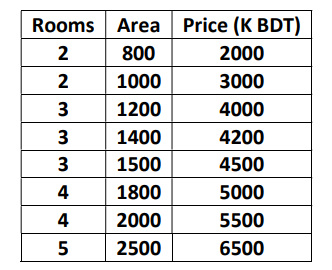

In [382]:
x1= np.array([2, 2, 3, 3, 3, 4, 4, 5],dtype='f')
x2 = np.array([800, 1000, 1200, 1400, 1500, 1800, 2000, 2500],dtype='f')
y = np.array([2000, 3000, 4000, 4200, 4500, 5000, 5500, 6500],dtype='f')

#1.Plotting

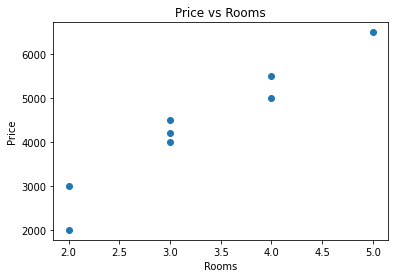

In [383]:
plt.scatter(x1,y)
plt.title('Price vs Rooms')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

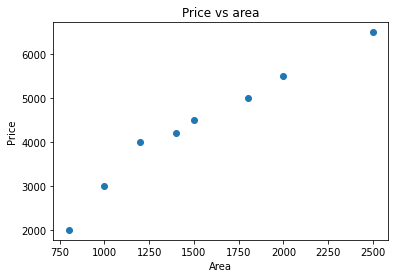

In [384]:
plt.scatter(x2,y)
plt.title('Price vs area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

#2.Formula


Let,


$x_1$ = Rooms

$x_2$ = Area

$y$ = predicted price

So, $y$ = $\theta_0$ + $\theta_1 x_1$ + $\theta_2 x_2$




#3.Gradient Descent

In [385]:
m = len(x1)
n = 3
J_hist = []
X = np.c_[x1, x2]

theta = np.random.randn(3, 1)
y = y.reshape(m, 1)
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
mu = mu.reshape(1, -1) 
sigma = sigma.reshape(1, -1)
ones = np.ones((m, 1),dtype='f')
mean_mat = np.dot(ones, mu)
std_mat =np.dot(ones, sigma)
X -= mean_mat
X /= std_mat
print(X)
print(m)

[[-1.2909944  -1.3904437 ]
 [-1.2909944  -1.006873  ]
 [-0.2581989  -0.62330234]
 [-0.2581989  -0.23973165]
 [-0.2581989  -0.04794633]
 [ 0.77459663  0.5274097 ]
 [ 0.77459663  0.9109803 ]
 [ 1.8073921   1.8699069 ]]
8


In [386]:
X= np.c_[ones,X]
print(X)

[[ 1.         -1.2909944  -1.3904437 ]
 [ 1.         -1.2909944  -1.006873  ]
 [ 1.         -0.2581989  -0.62330234]
 [ 1.         -0.2581989  -0.23973165]
 [ 1.         -0.2581989  -0.04794633]
 [ 1.          0.77459663  0.5274097 ]
 [ 1.          0.77459663  0.9109803 ]
 [ 1.          1.8073921   1.8699069 ]]


In [387]:
def computeLoss(X, y, theta):
  h = np.dot(X, theta)
  error = h-y
  error_sq = error**2

  J = 1/(2*m)
  J *= np.sum(error_sq)
  return J

In [388]:
def gradientDescent(X, y, theta, alpha=0.5, iterations=300):
  for i in range(iterations):
    h = np.dot(X, theta)
    error = h-y
    mse = np.dot(error.T,error)/(2*m)
    gradient_of_error = np.dot(X.T,(h-y))/m
    theta -= (alpha/m)*(np.dot(X.transpose(), error))
    J = computeLoss(X, y, theta)
    J_hist.append(J)
  return theta, error, gradient_of_error

In [389]:
gd_theta, gd_error, gradient_of_error = gradientDescent(X, y, theta)
print('Gradient of error: ', gradient_of_error.reshape(1, -1))
print('Parameters for Gradient Descent', gd_theta.reshape(1, -1))
gdd_theta=gd_theta.reshape((1,-1))

Gradient of error:  [[-2.84717316e-09  3.14763701e-01 -3.14763673e-01]]
Parameters for Gradient Descent [[4337.50002346  269.84574328 1021.34174031]]


#4.Change in Error

In [390]:
print(gd_error)

[[ 569.0281593 ]
 [ -39.27547102]
 [-368.72108369]
 [-177.02469879]
 [-281.17652537]
 [  85.226043  ]
 [ -23.07764819]
 [ 235.02122474]]


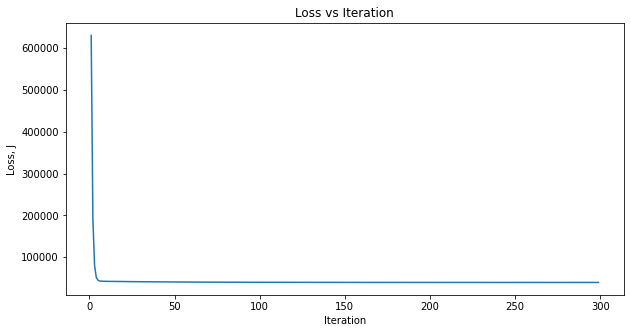

In [391]:

epoch = np.arange(1, len(J_hist))
plt.figure(figsize=(10,5))
plt.plot(epoch, J_hist[1:])
plt.xlabel('Iteration')
plt.ylabel('Loss, J')
plt.title('Loss vs Iteration')
plt.show()

#5.Estimated Model

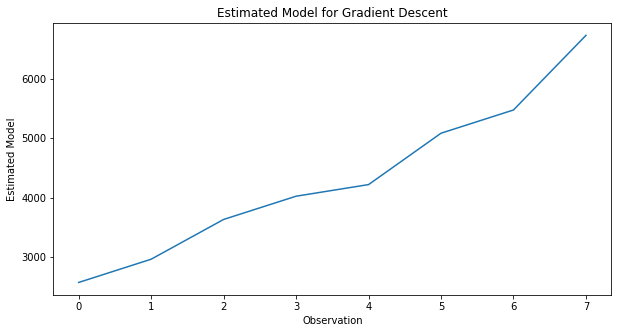

In [392]:
plt.figure(figsize=(10,5))
plt.plot(np.dot(X, gd_theta))
plt.xlabel('Observation')
plt.ylabel('Estimated Model')
plt.title('Estimated Model for Gradient Descent')
plt.show()

#6.Total Loss

In [393]:
total_loss = computeLoss(X, y, gd_theta)
mse = np.dot(gd_error.T, gd_error)/(2*m)
print('Total loss = ', total_loss)
print('Mean squared error = ', mse.item())

Total loss =  39669.892780790586
Mean squared error =  39669.99131193753


#7.Predicting price

In [394]:
X_test = np.array([[1, 2, 900], [1, 3, 1380], [1, 5, 2250], [1, 3, 1350]])
gd_pred = np.dot(X_test, gd_theta)
print(gd_pred)

[[ 924084.75778889]
 [1414598.6388809 ]
 [2303705.64443703]
 [1383958.3866716 ]]


#8.Using Library function

In [395]:
from sklearn import linear_model
model = linear_model.LinearRegression() 
model.fit(X, y)
coef = np.array(model.coef_[0, 1:], dtype='f')
intercept = np.array(model.intercept_, dtype='f')
lib_theta = np.hstack((intercept, coef))
lib_theta = lib_theta.reshape(n, 1)
print('Parameters', lib_theta.reshape(1, -1))
theta_lib= lib_theta.reshape((1,-1))


Parameters [[4337.5      255.69958 1035.4884 ]]


In [396]:
lib_y = model.predict(X)
lib_error = lib_y - y
print(lib_y)
lose_lib=computeLoss(X, y, lib_theta)
lib_mse = np.dot(lib_error.T, lib_error)/(2*m)
print('Total loss  = ', lose_lib)
print('MSE = ', lib_mse.item())


[[2567.605 ]
 [2964.788 ]
 [3626.0562]
 [4023.2393]
 [4221.8306]
 [5081.6904]
 [5478.8735]
 [6735.9165]]
Total loss  =  39665.5078125
MSE =  39665.5078125


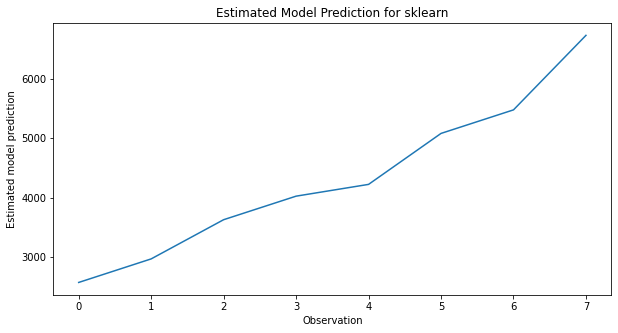

In [397]:
plt.figure(figsize=(10,5))
plt.plot(np.dot(X, lib_theta))
plt.xlabel('Observation')
plt.ylabel('Estimated model prediction')
plt.title('Estimated Model Prediction for sklearn')
plt.show()

In [398]:
lib_pred = model.predict(X_test)
print(lib_pred)

[[ 936788.4621582 ]
 [1434078.59533691]
 [2335464.90539551]
 [1403013.9432373 ]]


#9. Comparison

In [399]:
from prettytable import PrettyTable
y_table= PrettyTable(["Y_predicted using Gradient Descent", "Y_predicted using Library Function"])
for i in range(4):
  y_table.add_row([gd_pred[i],lib_pred[i]])

print(y_table)

+------------------------------------+------------------------------------+
| Y_predicted using Gradient Descent | Y_predicted using Library Function |
+------------------------------------+------------------------------------+
|         [924084.75778889]          |          [936788.4621582]          |
|         [1414598.6388809]          |         [1434078.59533691]         |
|         [2303705.64443703]         |         [2335464.90539551]         |
|         [1383958.3866716]          |         [1403013.9432373]          |
+------------------------------------+------------------------------------+


In [400]:
from prettytable import PrettyTable
theta_table= PrettyTable(["#","Theta using Gradient Descent", "Theta using Library Function"])
theta_table.add_row(["Theta_0",4337.50002243,4337.5])
theta_table.add_row(["Theta_1",255.69906699,255.69958])
theta_table.add_row(["Theta_2",1035.48841533,1035.4884])


print(theta_table)

+---------+------------------------------+------------------------------+
|    #    | Theta using Gradient Descent | Theta using Library Function |
+---------+------------------------------+------------------------------+
| Theta_0 |        4337.50002243         |            4337.5            |
| Theta_1 |         255.69906699         |          255.69958           |
| Theta_2 |        1035.48841533         |          1035.4884           |
+---------+------------------------------+------------------------------+


In [402]:
from prettytable import PrettyTable
lose_table= PrettyTable(["Lose(Gradient Descent)", "Lose(Library Function)"])
lose_table.add_row([total_loss,lose_lib])

print(lose_table)

+------------------------+------------------------+
| Lose(Gradient Descent) | Lose(Library Function) |
+------------------------+------------------------+
|   39669.892780790586   |     39665.5078125      |
+------------------------+------------------------+
